<a href="https://colab.research.google.com/github/venkatesh-manikumar/Datascience-Assignments/blob/main/california_housing_prices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [512]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [513]:
raw_data = pd.read_csv('/content/drive/MyDrive/DataScience/House_price_prediction/housing.csv')
train_data , test_data = train_test_split(raw_data,test_size=0.2 , random_state=24)

train_data.shape , test_data.shape

((16512, 10), (4128, 10))

In [514]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [515]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16348.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.566916,35.632673,28.628815,2631.201369,536.264803,1420.585816,498.319949,3.873669,206673.817648
std,1.996005,2.133147,12.597418,2181.741325,421.162159,1135.287024,382.250933,1.899005,115465.881796
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.770000,33.937500,18.000000,1441.750000,295.000000,782.000000,278.000000,2.562500,119500.000000
50%,-118.500000,34.260000,29.000000,2122.000000,433.000000,1163.500000,408.000000,3.539100,179450.000000
75%,-118.010000,37.720000,37.000000,3141.250000,644.000000,1721.250000,602.000000,4.752200,264500.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [516]:
train_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        164
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [517]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7309
INLAND        5287
NEAR OCEAN    2092
NEAR BAY      1820
ISLAND           4
Name: ocean_proximity, dtype: int64

<ipython-input-518-0c2cf90a270d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot = True)


<Axes: >

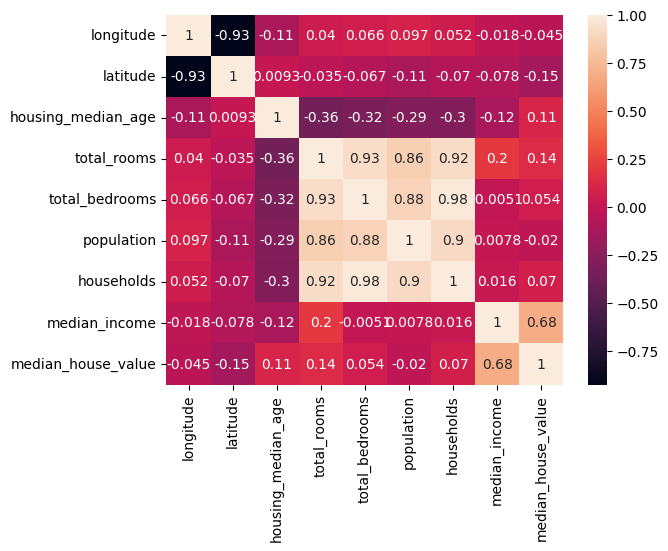

In [518]:
sns.heatmap(train_data.corr(),annot = True)

In [519]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
  def __init__(self,attribute_names):
    self.attribute_names=attribute_names
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    return X[self.attribute_names]


In [520]:
num_attributes=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']
cat_attributes=['ocean_proximity']

In [521]:
num_pipeline = Pipeline([
                             ('selector',DataFrameSelector(num_attributes)),
                             ('imputation', SimpleImputer(strategy='mean')),
                             ('scale', StandardScaler())

                        ])

cat_pipeline = Pipeline([
                             ('selector',DataFrameSelector(cat_attributes)),
                             ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),

                        ])

In [522]:
preprocess = ColumnTransformer(
                    transformers=
                                  [
                                    ('num_pipeline',num_pipeline,num_attributes),
                                    ('cat_pipeline',cat_pipeline,cat_attributes)
                                  ]
                              )

In [523]:
full_pipeline = Pipeline([
         ('preprocessing',preprocess),
         ('model',LinearRegression())
         ])

In [524]:
from sklearn import set_config
set_config(display='diagram')
display(full_pipeline)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('selector',
                                                                   DataFrameSelector(attribute_names=['longitude',
                                                                                                      'latitude',
                                                                                                      'housing_median_age',
                                                                                                      'total_rooms',
                                                                                                      'total_bedrooms',
                                                                                                      'population',
                                                                                                      'households',
                                                                                                      'median_income'])),
                                                                  ('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('selector',
                                                                   DataFrameSelector(attribute_names=['ocean_proximity'])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('model', LinearRegression())])

In [525]:
full_pipeline.fit(train_data,y=train_data[['median_house_value']])

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('selector',
                                                                   DataFrameSelector(attribute_names=['longitude',
                                                                                                      'latitude',
                                                                                                      'housing_median_age',
                                                                                                      'total_rooms',
                                                                                                      'total_bedrooms',
                                                                                                      'population',
                                                                                                      'households',
                                                                                                      'median_income'])),
                                                                  ('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('selector',
                                                                   DataFrameSelector(attribute_names=['ocean_proximity'])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('model', LinearRegression())])

In [526]:
test_labels=test_data[['median_house_value']]
test_data.drop(columns=['median_house_value'],inplace=True)

In [527]:
predicted = full_pipeline.predict(test_data)

In [528]:
lin_mse = mean_squared_error(test_labels,predicted)

In [529]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67350.13464737301

In [530]:
r2 = r2_score(test_labels,predicted)
r2

0.6576728852577686